In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import colors

from neutronMS import MS_sim, GEN_constQgeom
from IPython.display import clear_output

In [6]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## System

In [7]:
#geom = ('anular', 1.0, 1.3, 4)
#geom = ('cuboid', 1, 5, 4)
geom = ('cylinder', 1.2, 3)

mus=(0.361, 0.0259)
#S_files = ('./data_Sq/Sqw_vanadium/S_mesh.npy', './data_Sq/Sqw_vanadium/Q_vec.npy', './data_Sq/Sqw_vanadium/omega_vec.npy')
S_files = ('./data_Sq/Sqw_d-glycerol/S_mesh.npy', './data_Sq/Sqw_d-glycerol/Q_vec.npy', './data_Sq/Sqw_d-glycerol/omega_vec.npy')

## Geometry

In [8]:
ki=6.3788
kf=5.8738
theta=np.deg2rad(10)

In [9]:
sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
print('Q = ', round(sim.Q, 2), 'A^-1')
print('omega = ', round(sim.omega, 1), 'meV')

Q =  1.18 A^-1
omega =  12.8 meV


## N convergence (const B)

In [10]:
Ns = [2, 4, 7, 10, 20, 50, 100, 300, 600, 1000, int(1e4), int(1e5), int(1e6)]
B=40

In [11]:
rep = 10
ratio = np.zeros((rep,len(Ns)))

for n in range(len(Ns)):
    print('Running N = ', Ns[n])
    for r in range(rep):
        out = sim.run(N=Ns[n], B=B)
        ratio[r, n] = sim.Im/(sim.Is+sim.Im)
    clear_output()

In [12]:
ratio_mean = np.mean(ratio, axis=0)
ratio_std = np.std(ratio, axis=0)

Text(0, 0.5, 'I$_m$/(I$_s$+I$_m$)')

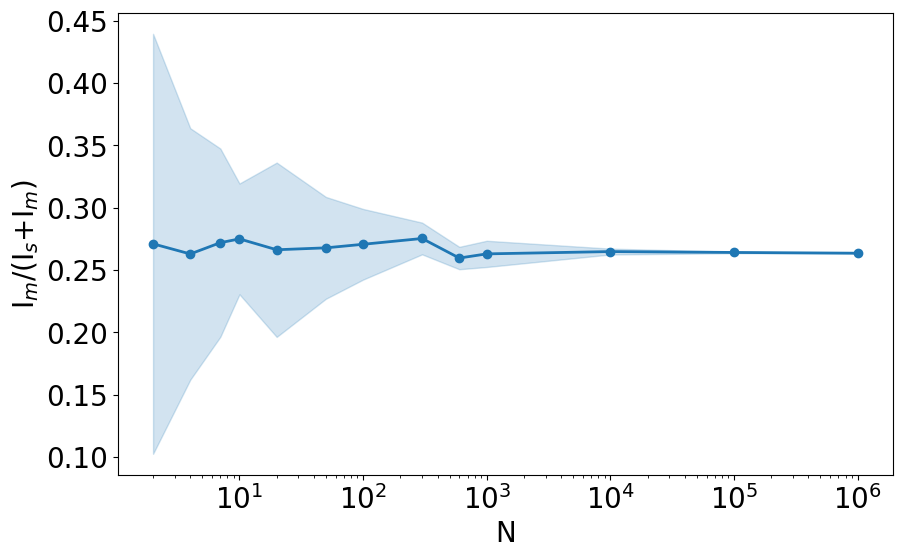

In [13]:
plt.figure(figsize=(10,6))
plt.plot(Ns, ratio_mean, 'C0', lw=2, marker='o')
plt.fill_between(Ns, ratio_mean-ratio_std, ratio_mean+ratio_std, color='C0', alpha=0.2)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('I$_m$/(I$_s$+I$_m$)')

Text(0, 0.5, 'I$_m$/(I$_s$+I$_m$)')

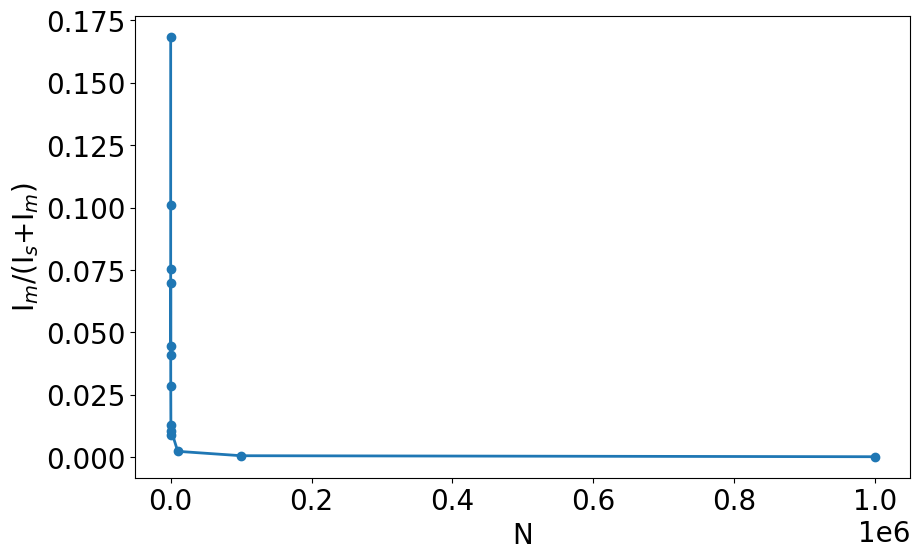

In [14]:
plt.figure(figsize=(10,6))
plt.plot(Ns, ratio_std, 'C0', lw=2, marker='o')
plt.xlabel('N')
plt.ylabel('std(I$_m$/(I$_s$+I$_m$))')

## B convergence (const N)

In [51]:
Bs = [3, 4, 5, 6, 7, 8, 10, 15, 20, 30, 40, 50, 70, 100, 200, 300, 400, 500, 700, 1000]
N = int(1e6)

In [52]:
rep = 10
ratio = np.zeros((rep,len(Bs)))

for b in range(len(Bs)):
    print('Running B = ', Bs[b])
    for r in range(rep):
        out = sim.run(N=N, B=Bs[b])
        ratio[r, b] = sim.Im/(sim.Is+sim.Im)
    clear_output()

In [53]:
ratio_mean = np.mean(ratio, axis=0)
ratio_std = np.std(ratio, axis=0)

Text(0, 0.5, 'I$_m$/(I$_s$+I$_m$)')

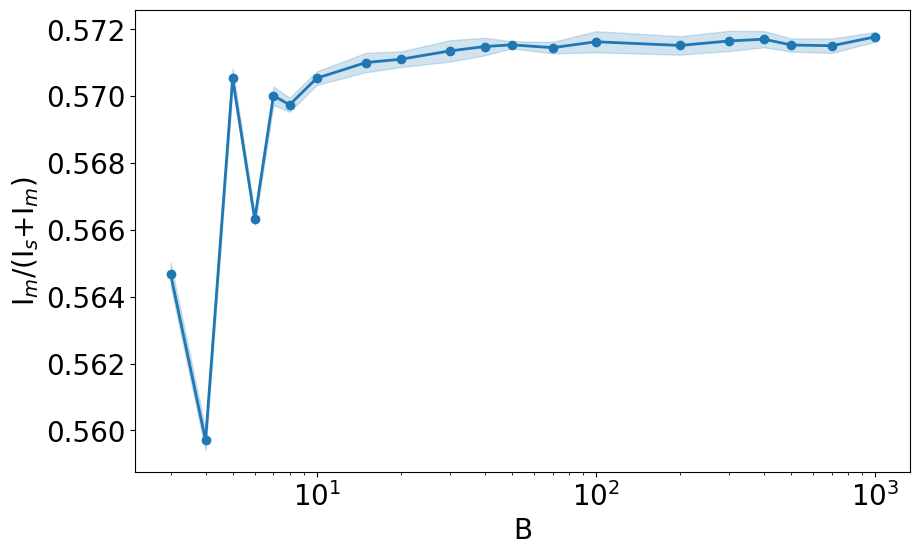

In [54]:
plt.figure(figsize=(10,6))
plt.plot(Bs, ratio_mean, 'C0', lw=2, marker='o')
plt.fill_between(Bs, ratio_mean-ratio_std, ratio_mean+ratio_std, color='C0', alpha=0.2)
plt.xscale('log')
plt.xlabel('B')
plt.ylabel('I$_m$/(I$_s$+I$_m$)')